# Rutgers Boot Camp - Project 1 Challenge

# DATA SOURCE - FILE HANDLER SECTION - WORKING WITH A LIST

In [1]:
#PREREQUISITES
#Source Input file = budget_data.csv
#Source File directory where budget_data.csv is stored needs to be replaced as per the environment
#Summary Putfile File directory where Financial_Analysis_Summary.txt is stored needs to be replaced as per the environment

#Python Code starts here

# Import Dependencies Section
import os, csv
from pathlib import Path 

#File Handling Section
dataFile = Path("/Users/babloo/Documents/rutgers/RutgersProject01", "project01/datafiles", "budget_data.csv")
summaryfile = Path("/Users/babloo/Documents/rutgers/RutgersProject01", "project01/output", "Financial_Analysis_Summary.txt")


# Lists Section
totalmonths = []
totalprofit = []
monthlyProfit = []
 
# Storing CSV Data Section
with open(dataFile,newline="", encoding="utf-8") as budgetData:

    budgetReader = csv.reader(budgetData,delimiter=",") 

    # Storing data taking the header out
    header = next(budgetReader)  

    for budgetrow in budgetReader: 

        # Keep adding the total months and total profit iteratively
        totalmonths.append(budgetrow[0])
        totalprofit.append(int(budgetrow[1]))

    # Calculate monthly change in profits
    for i in range(len(totalprofit)-1):
        
        monthlyProfit.append(totalprofit[i+1]-totalprofit[i])
        
# Determine maximum and minimum from the montly profit change
maxIncreaseProfit = max(monthlyProfit)
maxDecreaseProfit = min(monthlyProfit)

maxMonthlyIncrease = monthlyProfit.index(max(monthlyProfit)) + 1
maxMonthlyDecrease = monthlyProfit.index(min(monthlyProfit)) + 1 

# Print Console Output Section

print("Financial Analysis")
print("----------------------------")
print(f"Total Months: {len(totalmonths)}")
print(f"Total: ${sum(totalprofit)}")
print(f"Average Change: {round(sum(monthlyProfit)/len(monthlyProfit),2)}")
print(f"Greatest Increase in Profits: {totalmonths[maxMonthlyIncrease]} (${(str(maxIncreaseProfit))})")
print(f"Greatest Decrease in Profits: {totalmonths[maxMonthlyDecrease]} (${(str(maxDecreaseProfit))})")

# Summary File Section

with open(summaryfile,"w") as file:
    
    file.write("Financial Analysis")
    file.write("\n")
    file.write("----------------------------------")
    file.write("\n")
    file.write(f"Total Months: {len(totalmonths)}")
    file.write("\n")
    file.write(f"Total: ${sum(totalprofit)}")
    file.write("\n")
    file.write(f"Average Change: {round(sum(monthlyProfit)/len(monthlyProfit),2)}")
    file.write("\n")
    file.write(f"Greatest Increase in Profits: {totalmonths[maxMonthlyIncrease]} (${(str(maxIncreaseProfit))})")
    file.write("\n")
    file.write(f"Greatest Decrease in Profits: {totalmonths[maxMonthlyDecrease]} (${(str(maxDecreaseProfit))})")


Financial Analysis
----------------------------
Total Months: 86
Total: $22564198
Average Change: -8311.11
Greatest Increase in Profits: Aug-16 ($1862002)
Greatest Decrease in Profits: Feb-14 ($-1825558)


# DATA INTEGRATION - Reading data in a frame, merging data from two frames into a frame

In [38]:
# Dependencies Section
import pandas as pd
import numpy as np

# File Data Loading Section [Update the path where the CSV data files are located]

schoolData = pd.read_csv("/Users/babloo/Documents/rutgers/RutgersProject01/project01/datafiles/schools_complete.csv")
studentData = pd.read_csv("/Users/babloo/Documents/rutgers/RutgersProject01/project01/datafiles/students_complete.csv")

#schoolDataFile = Path("/Users/babloo/Documents/rutgers/RutgersProject01", "project01/datafiles", "schools_complete.csv")
#schoolSummaryfile = Path("/Users/babloo/Documents/rutgers/RutgersProject01", "project01/output", "School_Analysis_Summary.txt")


# Adding both school and students data in one dataframe
schoolDataMerged = pd.merge(schoolData, studentData, how="left", on=["school_name", "school_name"])
schoolDataMerged


,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84
...,...,...,...,...,...,...,...,...,...,...,...
39165,14,Thomas High School,Charter,1635,1043130,39165,Donna Howard,F,12th,99,90
39166,14,Thomas High School,Charter,1635,1043130,39166,Dawn Bell,F,10th,95,70
39167,14,Thomas High School,Charter,1635,1043130,39167,Rebecca Tanner,F,9th,73,84
39168,14,Thomas High School,Charter,1635,1043130,39168,Desiree Kidd,F,10th,99,90


In [23]:
schoolDataMerged.head()
schoolDataMerged.columns

Index(['School ID', 'school_name', 'type', 'size', 'budget', 'Student ID',
       'student_name', 'gender', 'grade', 'reading_score', 'math_score'],
      dtype='object')

In [ ]:
# DATA FRAME SECTION - Querying Dataframe with a particular record, Querying unique

In [27]:
schoolType = schoolDataMerged.loc[schoolDataMerged["type"] == "District", :]
schoolType

,School ID,school_name,type,size,budget,Student ID,student_name,gender,grade,reading_score,math_score
0,0,Huang High School,District,2917,1910635,0,Paul Bradley,M,9th,66,79
1,0,Huang High School,District,2917,1910635,1,Victor Smith,M,12th,94,61
2,0,Huang High School,District,2917,1910635,2,Kevin Rodriguez,M,12th,90,60
3,0,Huang High School,District,2917,1910635,3,Dr. Richard Scott,M,12th,67,58
4,0,Huang High School,District,2917,1910635,4,Bonnie Ray,F,9th,97,84
...,...,...,...,...,...,...,...,...,...,...,...
37530,13,Ford High School,District,2739,1763916,37530,William Rivera,M,9th,63,59
37531,13,Ford High School,District,2739,1763916,37531,Bernard Reid,M,9th,94,80
37532,13,Ford High School,District,2739,1763916,37532,Dawn Sawyer,F,12th,91,66
37533,13,Ford High School,District,2739,1763916,37533,Thomas Knapp,M,12th,75,70


# DATA INTEGRATION - Performing Count, Sum, Unique, Mean

In [30]:
# Schools and Students unique count Section
schoolCount = len(schoolDataMerged["school_name"].unique())
studentCount = schoolDataMerged["Student ID"].count()
totalSchoolbudget = schoolData["budget"].sum()

schoolCount
studentCount
totalSchoolbudget


24649428

In [31]:
schoolDataMerged["student_name"].unique()

array(['Paul Bradley', 'Victor Smith', 'Kevin Rodriguez', ...,
       'Rebecca Tanner', 'Desiree Kidd', 'Carolyn Jackson'], dtype=object)

In [39]:
schoolDataMerged["student_name"].nunique()

32715

In [32]:
schoolData["budget"].sum()

24649428

In [33]:
schoolDataMerged["Student ID"].count()

39170

In [46]:
averageMathScore = schoolDataMerged["math_score"].mean()
medianMathScore = schoolDataMerged["math_score"].median()
varMathScore = schoolDataMerged["math_score"].var()
stdMathScore = schoolDataMerged["math_score"].std()
semMathScore = schoolDataMerged["math_score"].sem()

print(f"Statistics: {averageMathScore}  {medianMathScore} {varMathScore} {stdMathScore} {semMathScore}")


Statistics: 78.98537145774827  79.0 151.5353115434463 12.309967974915544 0.06219853238030732


In [60]:
statisticalData = schoolDataMerged.groupby(['math_score'])
statisticalResults = statisticalData['math_score'].agg(['mean', 'median', 'var', 'std', 'sem'])
#statisticalData
statisticalResults

,mean,median,var,std,sem
math_score,,,,,
55,55,55,0,0.0,0.0
56,56,56,0,0.0,0.0
57,57,57,0,0.0,0.0
58,58,58,0,0.0,0.0
59,59,59,0,0.0,0.0
60,60,60,0,0.0,0.0
61,61,61,0,0.0,0.0
62,62,62,0,0.0,0.0
63,63,63,0,0.0,0.0


In [8]:
passingMathCount = schoolDataMerged[(schoolDataMerged["math_score"] >= 70)].count()["student_name"]
passingMathCount

29370

# DATA INTEGRATION SECTION - Storing results, number formatting

In [10]:
districtResults = pd.DataFrame({"Total number of unique schools": [schoolCount], 
                                "Total Students": [studentCount],
                                "Total Budget": [totalSchoolbudget]})
#districtResults

districtResults = districtResults[["Total number of unique schools", "Total Students", "Total Budget"]]
districtResults["Total Students"] = districtResults["Total Students"].map("{:,}".format)
districtResults["Total Budget"] = districtResults["Total Budget"].map("${:,.2f}".format)

districtResults

,Total number of unique schools,Total Students,Total Budget
0,15,"39,170","$24,649,428.00"


# DATA INTEGRATION SECTION - indexing, count, grouping

In [12]:
schoolType = schoolData.set_index(["school_name"])["type"]

# Get total student count
countBySchool = schoolDataMerged["school_name"].value_counts()

In [71]:
# Total school budget and per student spending Calculation
budgetBySchool = schoolDataMerged.groupby(["school_name"]).mean()["budget"]
budgetBySchool.head(5)


school_name
Bailey High School      3124928.0
Cabrera High School     1081356.0
Figueroa High School    1884411.0
Ford High School        1763916.0
Griffin High School      917500.0
Name: budget, dtype: float64

In [68]:
numofStudentsperSchool = schoolDataMerged.groupby(["school_name"])
numofStudentsperSchool

# DATA INTEGRATION SECTION - Sorting Ascending, Descending

In [17]:
# Get total student count
countBySchool = schoolDataMerged["school_name"].value_counts()

# Total school budget and per student spending Calculation
budgetBySchool = schoolDataMerged.groupby(["school_name"]).mean()["budget"]
perStudentBudget = budgetBySchool / countBySchool

In [128]:
schoolResults = pd.DataFrame({"School Type": schoolType,
                                   "Total Students": countBySchool,
                                   "Total School Budget": budgetBySchool,
                                  "Per Student Budget": perStudentBudget})

# Formatting data
schoolResults = schoolResults[["School Type", "Total Students", "Total School Budget", "Per Student Budget"]]

ValueError: Shape of passed values is (11, 4), indices imply (15, 4)

In [48]:
highPerformingSchools = schoolResults.sort_values(["Per Student Budget"], ascending=True)
highPerformingSchools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget
Wilson High School,Charter,2283,1319574.0,578.0
Holden High School,Charter,427,248087.0,581.0
Cabrera High School,Charter,1858,1081356.0,582.0
Wright High School,Charter,1800,1049400.0,583.0
Shelton High School,Charter,1761,1056600.0,600.0


In [49]:
lowPerformingSchools = schoolResults.sort_values(["Per Student Budget"], ascending=False)
lowPerformingSchools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget
Huang High School,District,2917,1910635.0,655.0
Hernandez High School,District,4635,3022020.0,652.0
Johnson High School,District,4761,3094650.0,650.0
Ford High School,District,2739,1763916.0,644.0
Figueroa High School,District,2949,1884411.0,639.0


# DATA ANALYSIS - CHARTING - Bar and Pie Charts¶

In [76]:
numofStudentsperSchool = schoolDataMerged.groupby(["school_name"]).count()["Student ID"]
numofStudentsperSchool.head(20)

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: Student ID, dtype: int64

Text(0.5, 1.0, 'Number of Student per School')

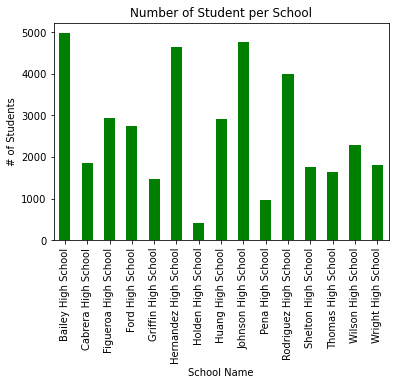

In [83]:
# Generate a bar plot showing the total number of students (Student ID) for 
# each school using Pandas.

import matplotlib.pyplot as plt
import scipy.stats as st
plot_pandas = numofStudentsperSchool.plot.bar(color='g')  
plt.xlabel("School Name")
plt.ylabel("# of Students")
plt.title("Number of Student per School")


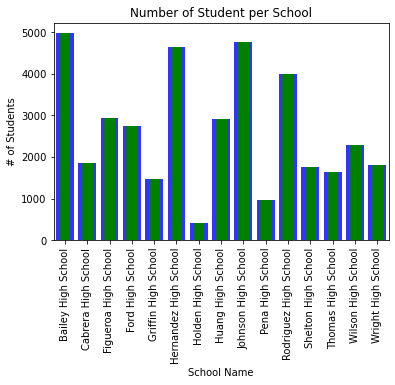

In [84]:
# Generate a bar plot showing the total number of students (Student ID) for 
# each school using pyplot.
x_axis = numofStudentsperSchool.index.values
y_axis = numofStudentsperSchool.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plot_pandas = numofStudentsperSchool.plot.bar(color='g')  
plt.xlabel("School Name")
plt.ylabel("# of Students")
plt.title("Number of Student per School")
plt.xticks(rotation="vertical")

plt.show()

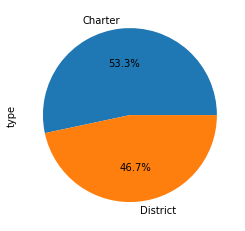

In [85]:
# Generate a pie plot showing the distribution of students 
# between Charter and District schools using Pandas

countByschoolType = schoolData.set_index(["school_name"])["type"].value_counts()
countByschoolType.plot(kind='pie', autopct='%1.1f%%', startangle=0)
plt.show()

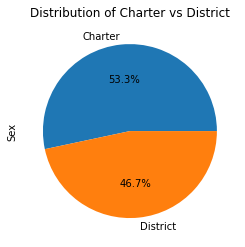

In [87]:
# Generate a pie plot showing the distribution of students 
# between Charter and District pyplot

countByschoolType = schoolData.set_index(["school_name"])["type"].value_counts()
plt.pie(countByschoolType, labels=countByschoolType.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Charter vs District')
plt.ylabel('Sex')
plt.show()

# Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

CapomulinDF = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
#CapomulinDF.head()
xAxis = CapomulinDF["Timepoint"]
tumorVolume = CapomulinDF["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(xAxis, tumorVolume,linewidth=2, markersize=15,label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [93]:
numofStudentsperGrade = schoolDataMerged.groupby(["grade"]).count()["Student ID"]
numofStudentsperGrade.head(20)

grade
10th    10168
11th     9695
12th     7899
9th     11408
Name: Student ID, dtype: int64

In [112]:
# Start by getting the last (greatest) timepoint for each mouse

listofGrades = ["9th", "10th", "11th", "12th"]
combinedwithGrades = schoolDataMerged[schoolDataMerged["budget"].isin(listofGrades)]
combinedwithGrades.head()

lastTimepoint = combinedwithGrades.groupby(["grade", "Student ID"]).agg(school_size=("size", lambda x: x.iloc[-1]))
#Reshape dataframe
lastTimepoint = lastTimepoint.stack(level=0).unstack(level=0)
for agrade in listofGrades:
    print(agrade)

9th
10th
11th
12th


In [116]:
boxplotList = []
#listofGrades = ["9th", "10th", "11th", "12th"]
#listofGrades = ["10th", "11th", "12th"]

for agrade in listofGrades:
    agrade
    boxplotList.append(list)
    #boxplotList.append(list(lastTimepoint[agrade].dropna()))
    
#fig = plt.figure()
#plt.xticks([1,2,3,4], listofGrades, rotation=0)
#plt.ylabel("grade")
#plt.title("student")
#plt.boxplot(boxplotList, labels=listofGrades)

#plt.show()


In [106]:
Index(['School ID', 'school_name', 'type', 'size', 'budget', 'Student ID',
       'student_name', 'gender', 'grade', 'reading_score', 'math_score'],
      dtype='object')

NameError: name 'Index' is not defined

In [125]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import dependencies
from scipy.stats import linregress

# Filter the Capomulin data
#schoolDataMerged
gradeDF = schoolDataMerged[schoolDataMerged["grade"] == "9th"]
gradeDF
# Calculate the average tumor volume for each mouse on Capomulin
avgStudentVolume = gradeDF.groupby(["Student ID"]).mean()
#avgTumorVolume = CapomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avgStudentVolume

# Generate a scatter plot of mouse weight versus average tumor volume
ax = avgStudentVolume.plot(kind="scatter", x="grade", y="size")

# Calculate the correlation coefficient and linear regression model
#slope, intercept, rvalue, pvalue, stderr = linregress(avgStudentVolume["grade"], avgStudentVolume["size"])
print(f"The correlation between mouse weight and the average tumor volume is: {rvalue}")
#print(f"Linear regression equation: y = {slope}x + {intercept}")

# Add the linear regression line to the scatter plot
x = avgTumorVolume["grade"]
ax.plot(x, slope*x + intercept, color="red")

,School ID,size,budget,reading_score,math_score
Student ID,,,,,
0,0,2917,1910635,66,79
4,0,2917,1910635,97,84
5,0,2917,1910635,94,94
12,0,2917,1910635,64,79
13,0,2917,1910635,71,79
...,...,...,...,...,...
39152,14,1635,1043130,98,84
39153,14,1635,1043130,80,75
39157,14,1635,1043130,79,94


# API MANAGEMENT ¶

In [132]:
# Dependencies and Setup **
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [133]:
import datetime as dt
import requests


#weatherAPIKey = "444914521cafc2f13469a6c401b0fd7d"
weatherBASEUrl = "https://api.openweathermap.org/data/2.5/weather?"
#API_KEY = open('weatherAPI_keys.txt', 'r').read()
CITY = "London"

finalWeatherURL = weatherBASEUrl + "appid=" + weather_api_key + "&q=" + CITY
response = requests.get(finalWeatherURL).json()
print(response)

NameError: name 'weather_api_key' is not defined

# API CONNECTIVITY

In [136]:
import requests
response = requests.get("https://api.openweathermap.org/data/2.5/weather?")
print(response.status_code)

401


In [137]:
url = weatherBASEUrl + "appid=" + weather_api_key
print(url)
city = "Paris"
unitIn = "metric"
city_url = url + "&q=" + city + "&units=" + unitIn
print(city_url)

NameError: name 'weather_api_key' is not defined

# API DATA HANDLING

In [ ]:
# Set the API base URL
weatherBASEUrl = "https://api.openweathermap.org/data/2.5/weather?"
unitIn = "metric"
url = weatherBASEUrl + "appid=" + weather_api_key + "&units=" + unitIn
print(url)


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    print(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
#        {"coord":{"lon":2.3488,"lat":48.8534}}]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
       # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')        
        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng})
       # print(city_data)

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

# Show Record Count
city_data_df.count()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
    
# Display sample data
city_data_df.head()

# Build a scatter plot

In [ ]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lats,  # sets x_axis
            max_temps,  # sets y_axis
            edgecolor="black", linewidths=1, marker="o",  # describes line
            alpha=0.8, label="Cities") # more description

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()

# Compute Linear Regression for Each Relationship

In [ ]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def plot_linear_regression(xVals, yVals, title, yLabel, textCoordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(xVals, yVals)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = xVals * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(xVals,yVals)
    plt.plot(xVals,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, textCoordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(yLabel)
    plt.show()   

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
    

# Display sample data
southern_hemi_df.head()

In [ ]:
# Linear regression on Northern Hemisphere
xVals = northern_hemi_df["Lat"]
yVals = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(xVals,
                       yVals,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))